# World Happiness Report Project

## Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
Dystopia is an imaginary country that has the World’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


**You need to predict the happiness score considering all the other factors mentioned in the dataset.**

### Dataset
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

In [1]:
# Importing important library

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
# Checking the last 6 data
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
# checking the shape
df.shape

(158, 12)

There are 158 rows and 12 columns out of 12 Happiness Score is the label

In [5]:
# checking the columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
# Checking the data type
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Data types are object int and float for the data set

In [7]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As there are 152 data in each column, data do not have any null values and  float64(9), int64(1), object(2) and memory usage: 14.9+ KB

In [8]:
# Checking the null value in each columns
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values found

In [12]:
# Checking the value count for Region column
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

10 regions are there so we can say it is a categorical feature

In [57]:
# Checking number of unique value in all column
df.nunique().to_frame()

,0
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


As we can see county are all unique and object so we can't decode it in categorical feature We will be dropping this feature.

In [13]:
# Checkking the statics of the fetures
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From description:-

1.All column have 158 values so no missing value present.

2.The std is more than 10 % of mean there might be outliers

- standard error
- Family
- Freedom
- Trust
- Generosity
- Dystopia Residual

3.Some of the minimum value are doubtful

- Economy
- Health

4.The difference between min,25%,50%,75% and normal.

5.The mean value is almost equal to median (50%)   


**We only analysis continues variable not the categorical one**


In [153]:
# Checking the skewness
df.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

As acceptable rage is from -0.5 to .05 
- Standard Error
- Family
- Health (Life Expectancy)
- Trust (Government Corruption)
- Generosity is out of range. 
We need to fix the Skewness later

### Visual Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univarent analysist

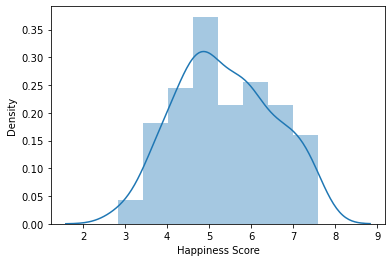

In [19]:
# Checking distribution
sns.distplot(df['Happiness Score'])
plt.show()

It look like normal distribution.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

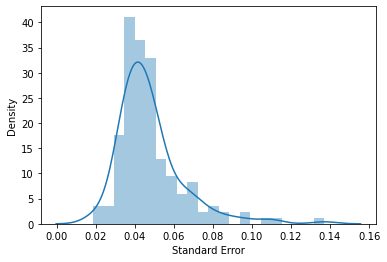

In [20]:
sns.distplot(df['Standard Error'])

Graph shows right skewed data

In [170]:
df2=df.drop(df[['Country','Region']],axis=1)

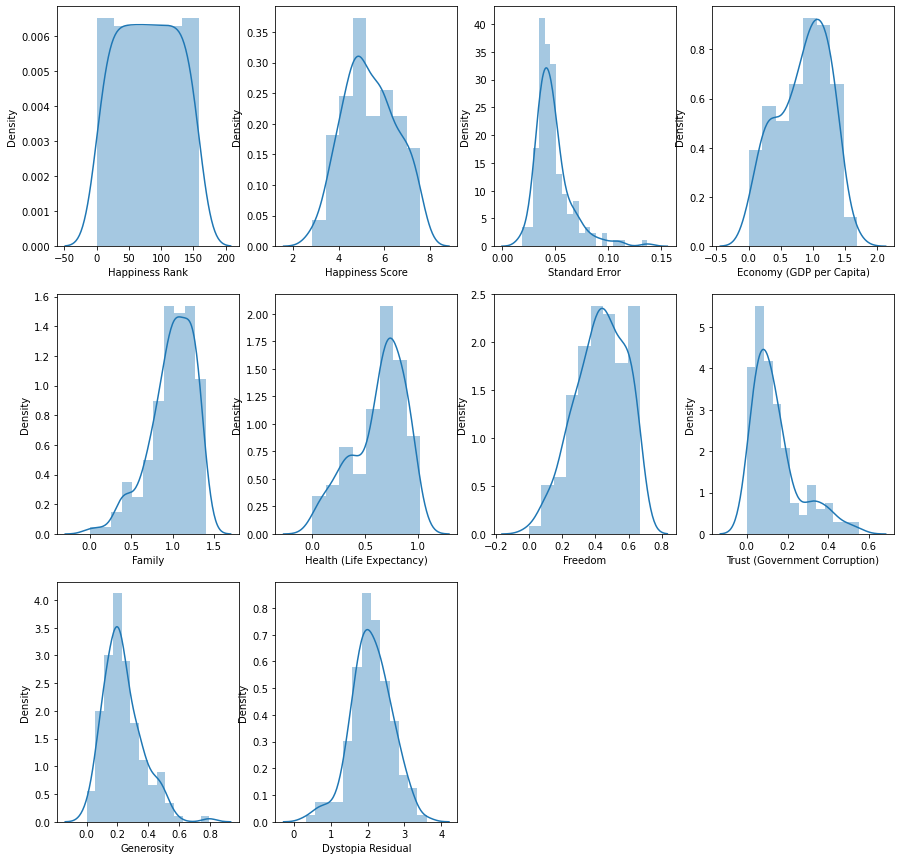

In [24]:
plt.figure(figsize=(15,15))
i=1
for j in df2.columns:
    if i <=10:
        ax=plt.subplot(3,4,i)
        sns.distplot(df[j])
    i+=1
plt.show()

From the above graph
- standard error
- family
- Health
- Trust
- generosity

are skewed


### By-varient analysis

In [155]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

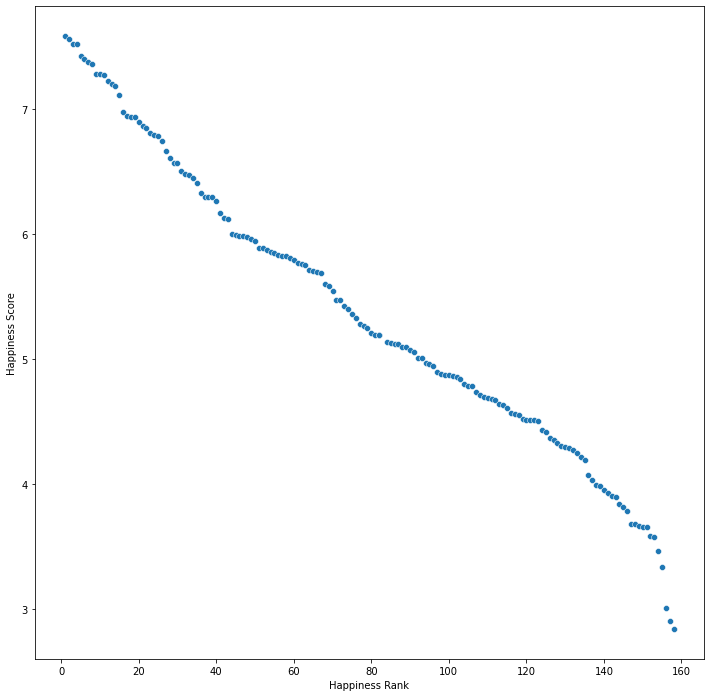

In [156]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(y='Happiness Score',x='Happiness Rank',data=df)


By the graph as the rank increases happiness score decreases

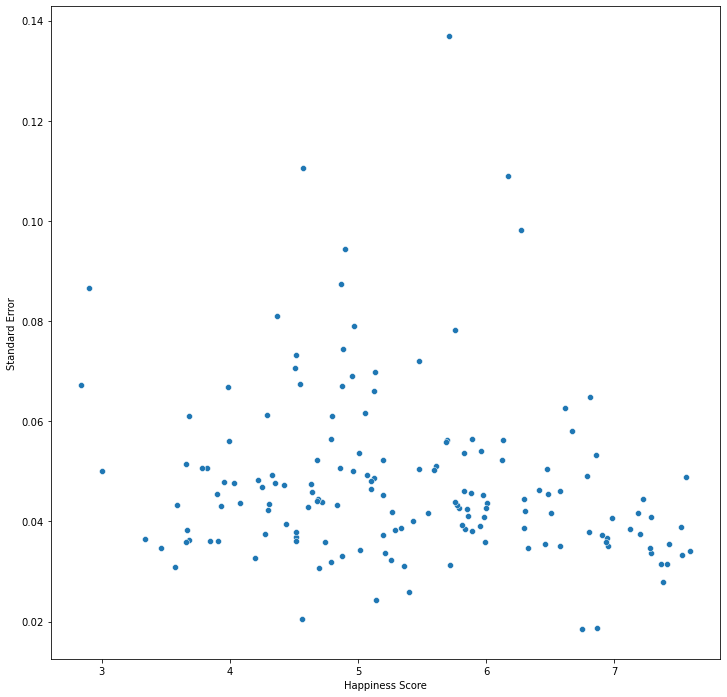

In [157]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(y='Standard Error',x='Happiness Score',data=df)


No pattern visible in Graph

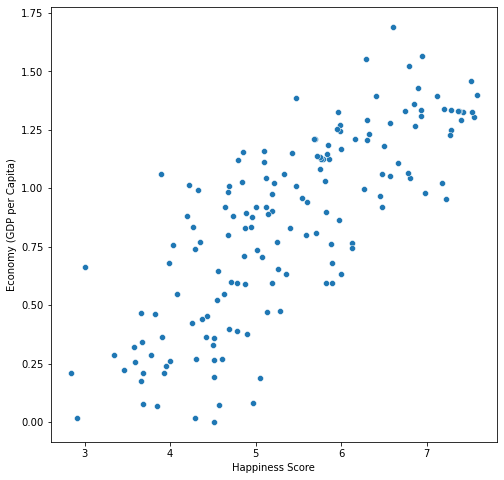

In [158]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Economy (GDP per Capita)',x='Happiness Score',data=df)

Positive trend is visible in Graph

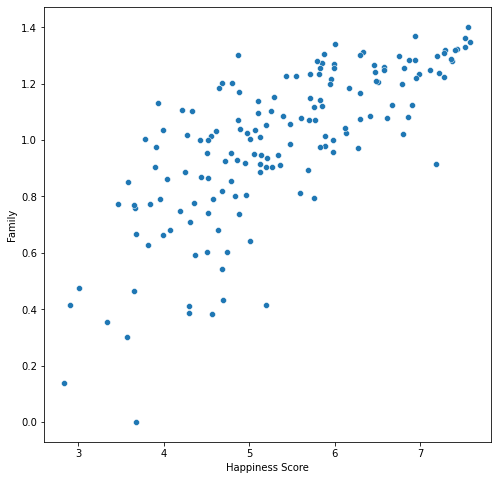

In [159]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Family',x='Happiness Score',data=df)

Positive trend is visible in Graph

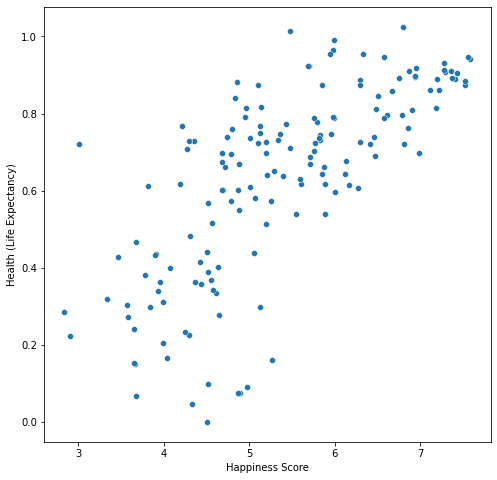

In [160]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Health (Life Expectancy)',x='Happiness Score',data=df)

Positive trend is visible in Graph

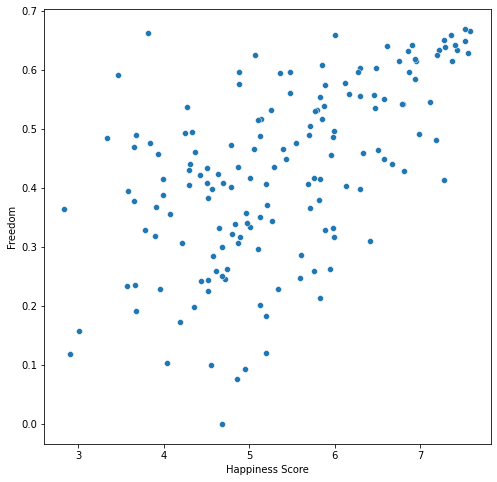

In [161]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Freedom',x='Happiness Score',data=df)

Positive trend is visible in Graph

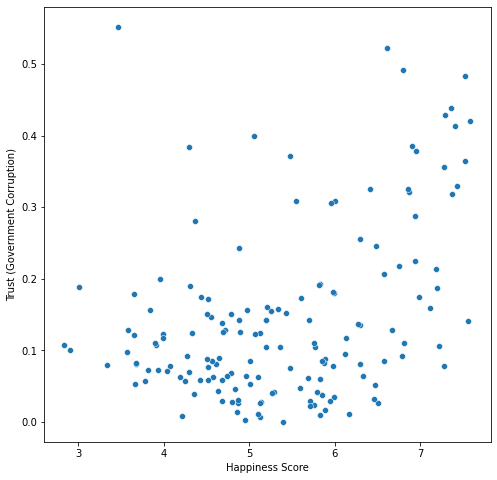

In [162]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Trust (Government Corruption)',x='Happiness Score',data=df)

No visible trend

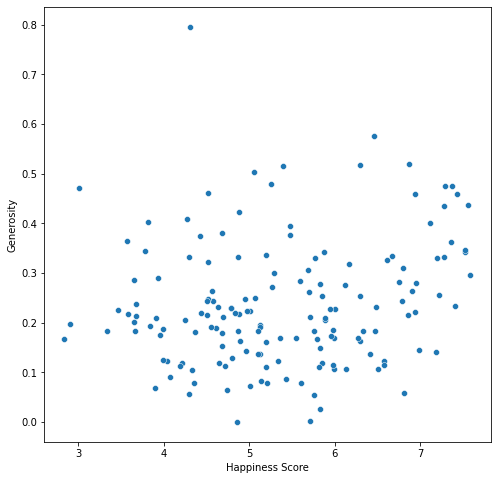

In [163]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Generosity',x='Happiness Score',data=df)

No visible trend

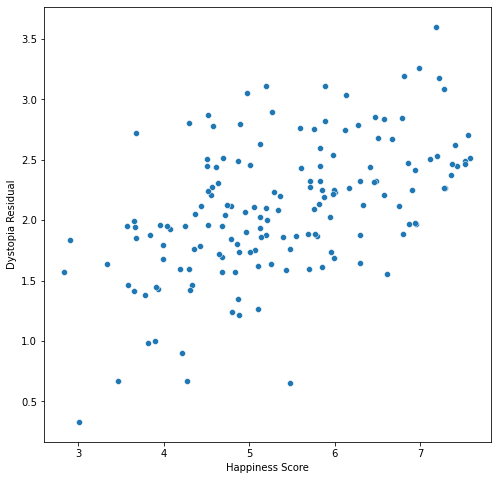

In [164]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='Dystopia Residual',x='Happiness Score',data=df)

Positive trend is visible in Graph

### Multivarient Analysis

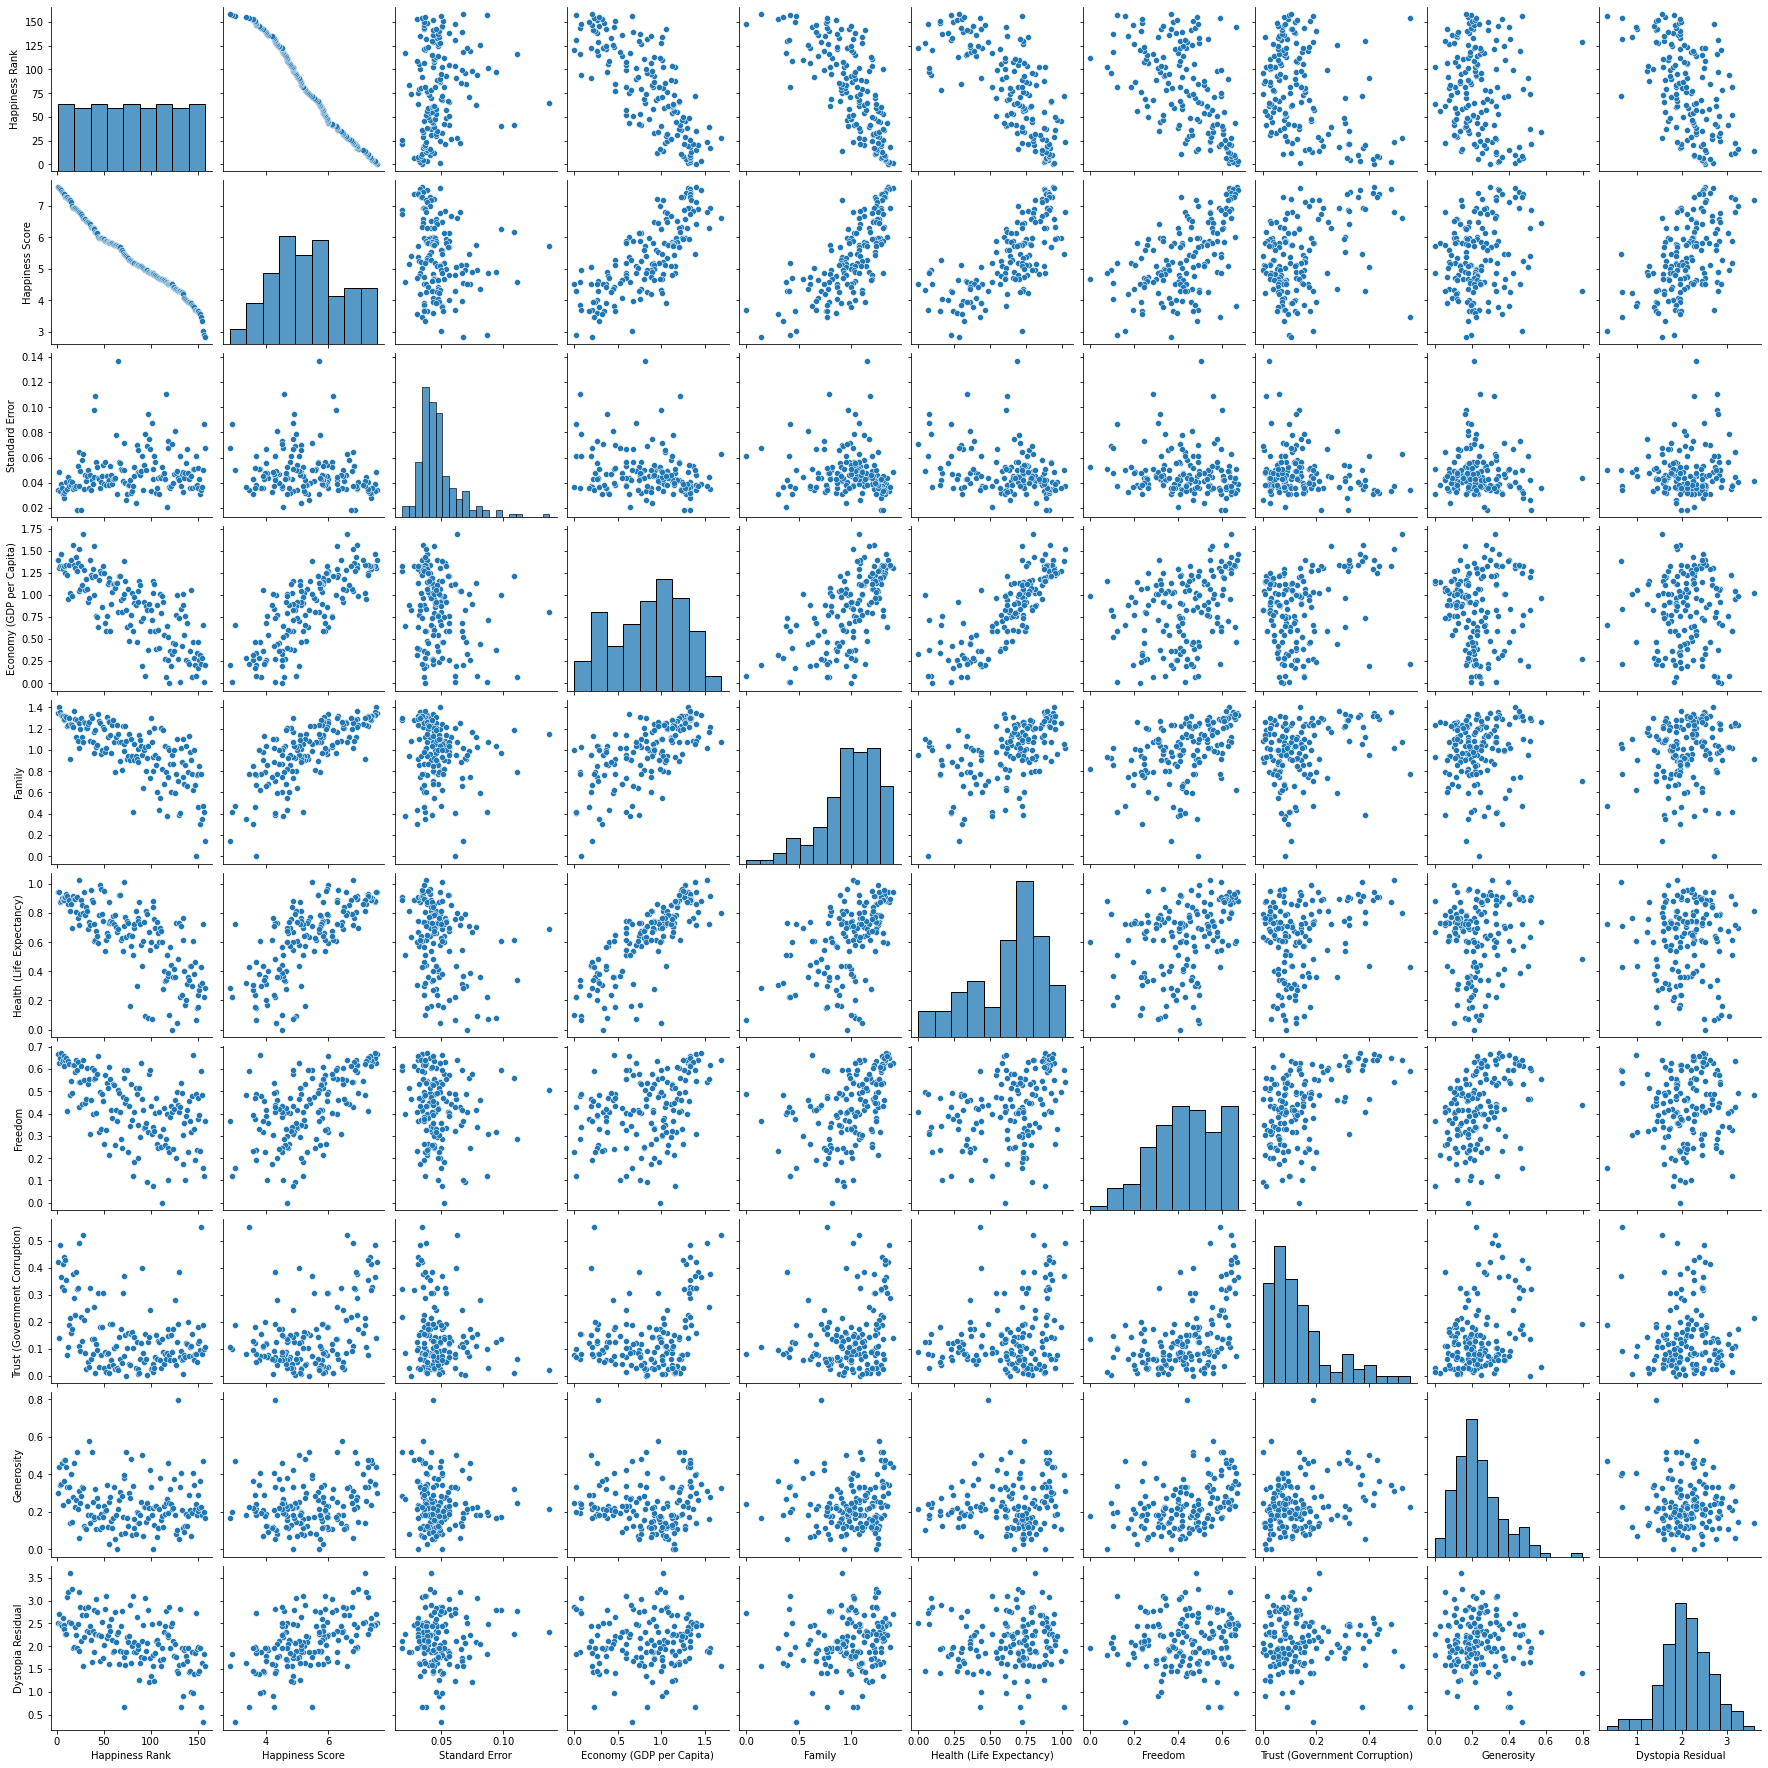

In [31]:
sns.pairplot(df2)

There is correlation between 
- family
- GDP


### Checking the outlier

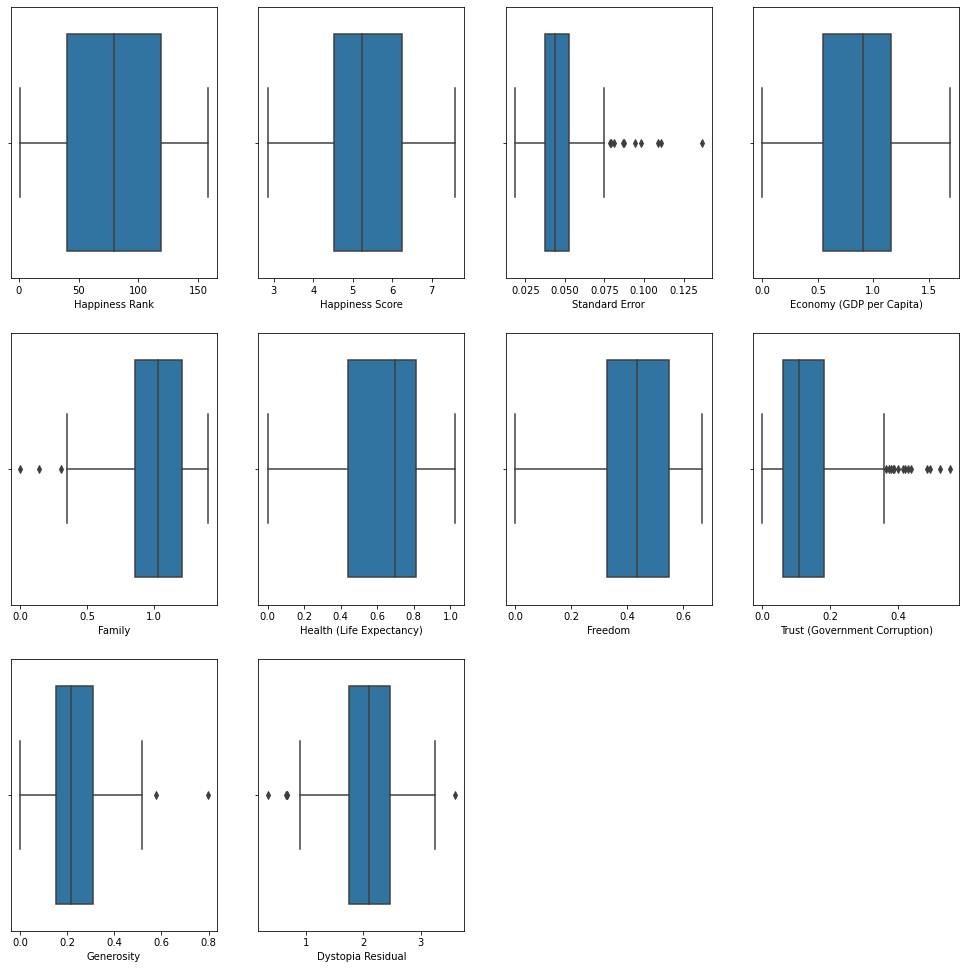

In [36]:
plt.figure(figsize=(17,17))
i=1
for j in df2.columns:
    if i <=10:
        ax=plt.subplot(3,4,i)
        sns.boxplot(x=df2[j],data=df2)
    i+=1
plt.show()

As we can see there are outliers in
- Dystopia
- Generosity
- Trust
- Family
- Standard Error

But we only have 158 data so we are not going to remove outliers

In [165]:
# Finding the correlation
df2.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


- High correlation in Happiness Rank and happiness score.
- High correlation in Family and Economy
- High correlation in Economy and Health

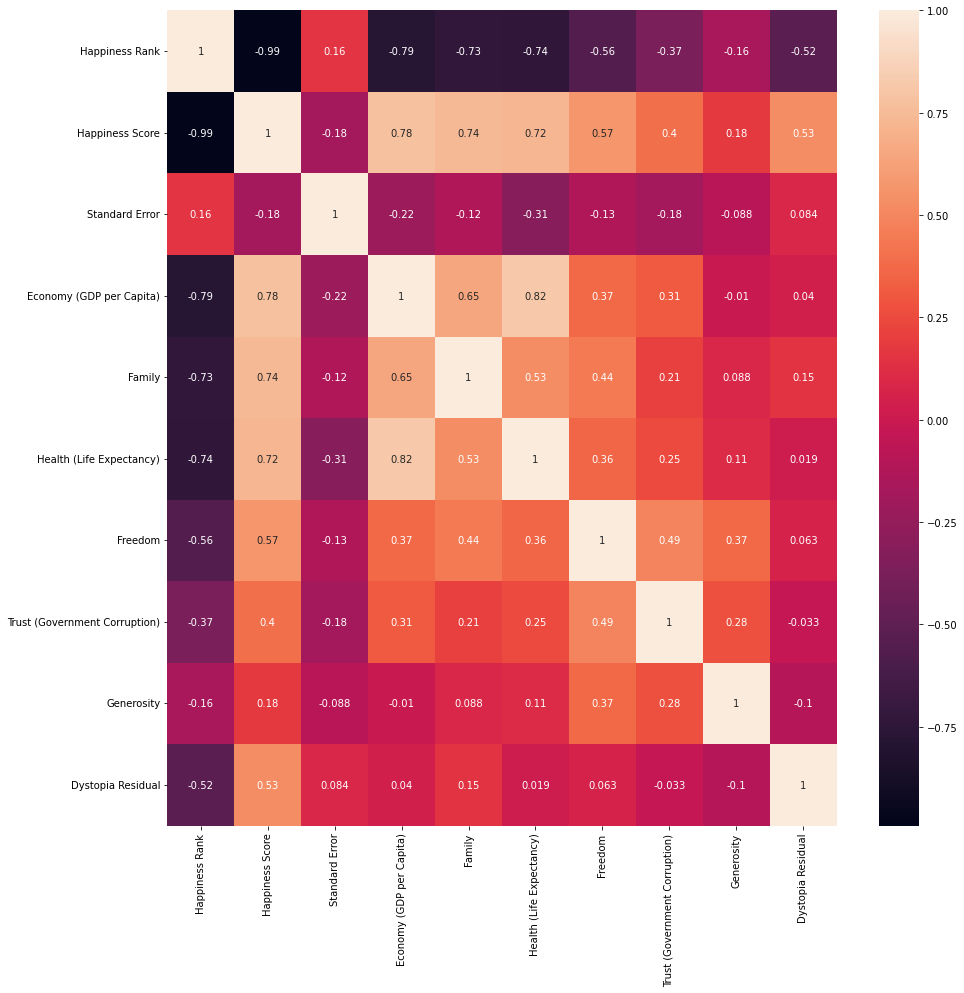

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [171]:
# Removing the Happiness Rank
df2=df2.drop('Happiness Rank',axis=1)

Happiness Rank and Happiness Score is highly correlated

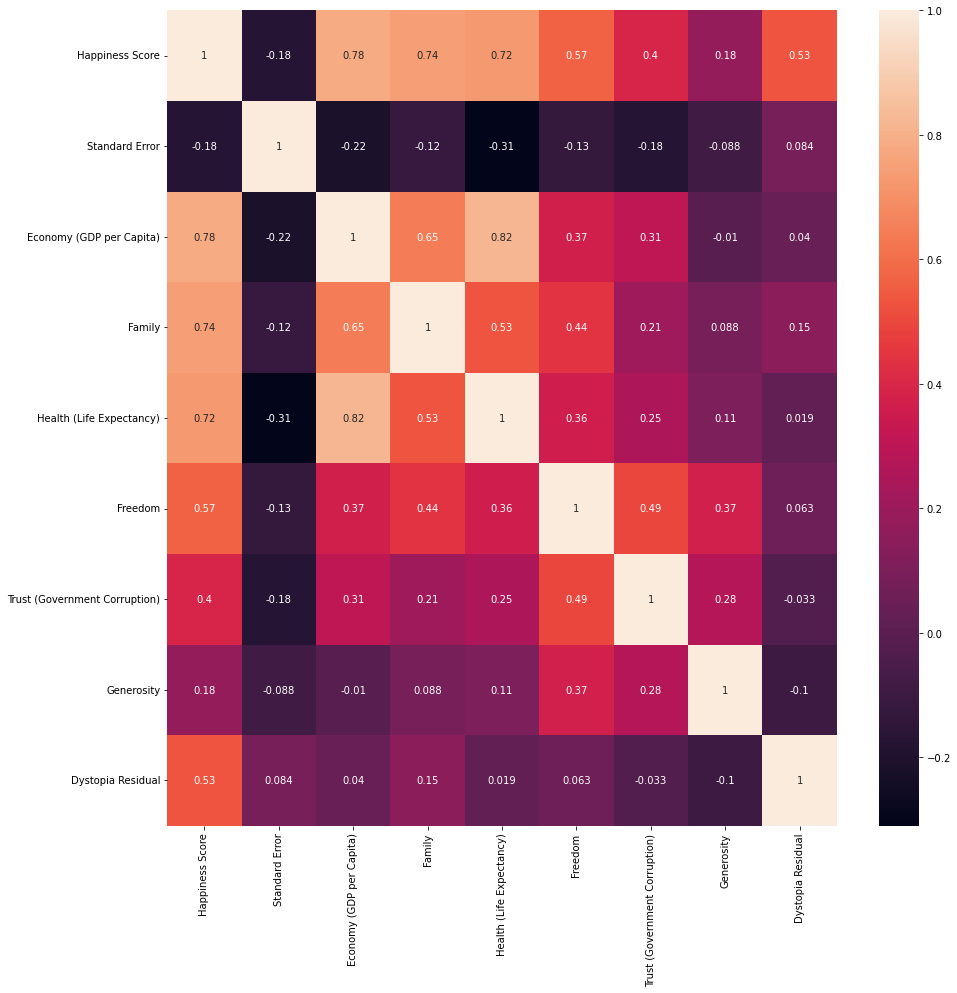

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True)
plt.show()

- High correlation in Family and Economy
- High correlation in Economy and Health

In [58]:
# correlation with target variable
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

### Encoding

Region is encoded using LabelEncoder

In [64]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['Region'])
pd.Series(df2)
df['Region']=df2
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Region have 10 categories which are encoded from 0-9

In [67]:
df.Region.value_counts().to_frame()

,Region
8,40
1,29
3,22
9,21
4,20
6,9
7,7
2,6
5,2
0,2


- Sub-Saharan Africa                  8
- Central and Eastern Europe          1
- Latin America and Caribbean         3
- Western Europe                      9
- Middle East and Northern Africa     4
- Southeastern Asia                   6
- Southern Asia                       7
- Eastern Asia                        2
- North America                       5
- Australia and New Zealand           0

In [177]:
df2

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Making the copy of dataset as df3

In [179]:
df3=df2

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    int32  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 11.9 KB


In [81]:
# Statistical summary of numerical
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [83]:
# checking the correlationbetween features and the target.
cor=df3.corr()
cor

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


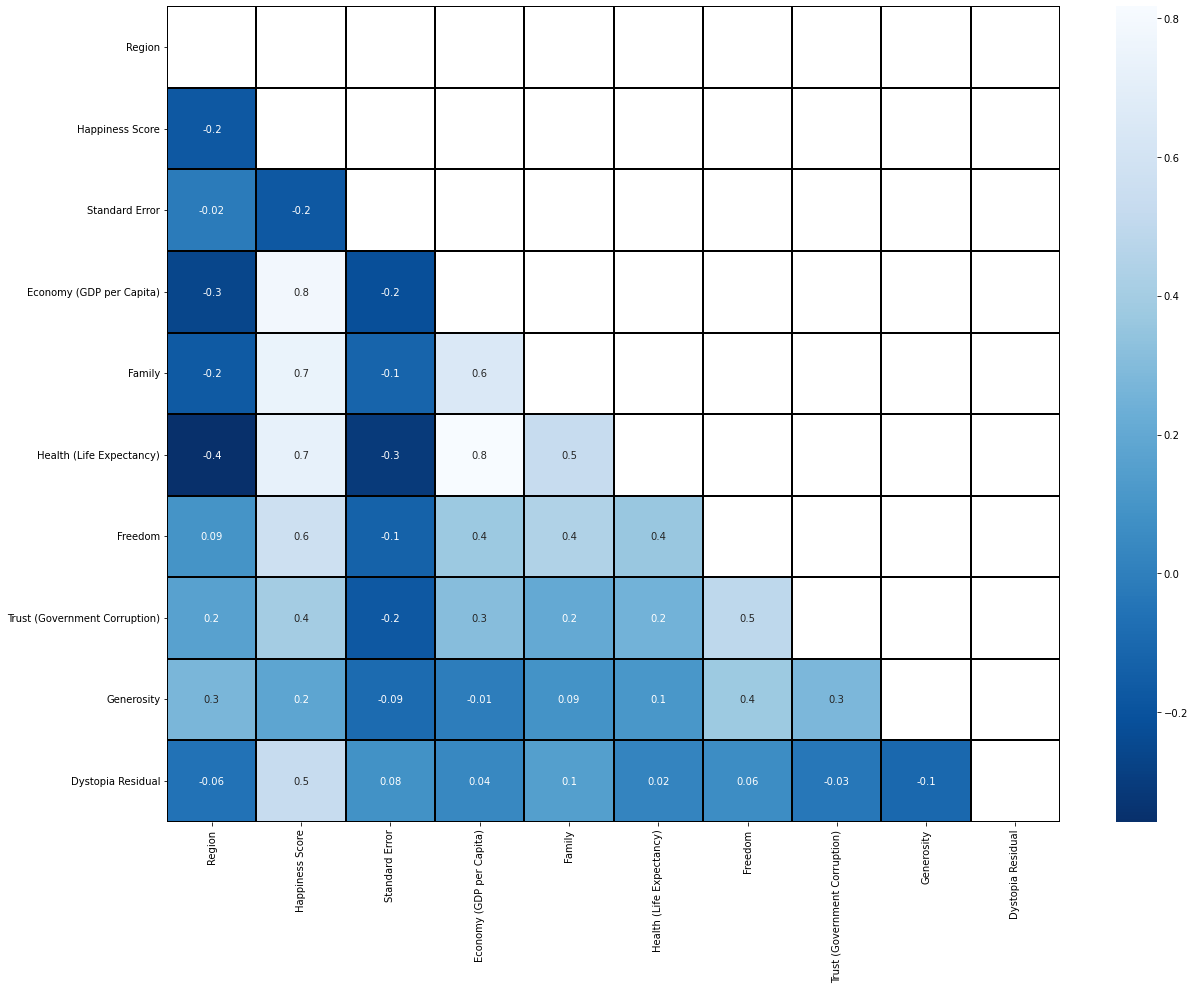

In [85]:
# Visualizing the correlation matrix by plotting heatmap
import numpy as np
mask = np.triu(np.ones_like(df3.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df3.corr(), mask=mask, cmap='Blues_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

In [86]:
cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region                          -0.176791
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

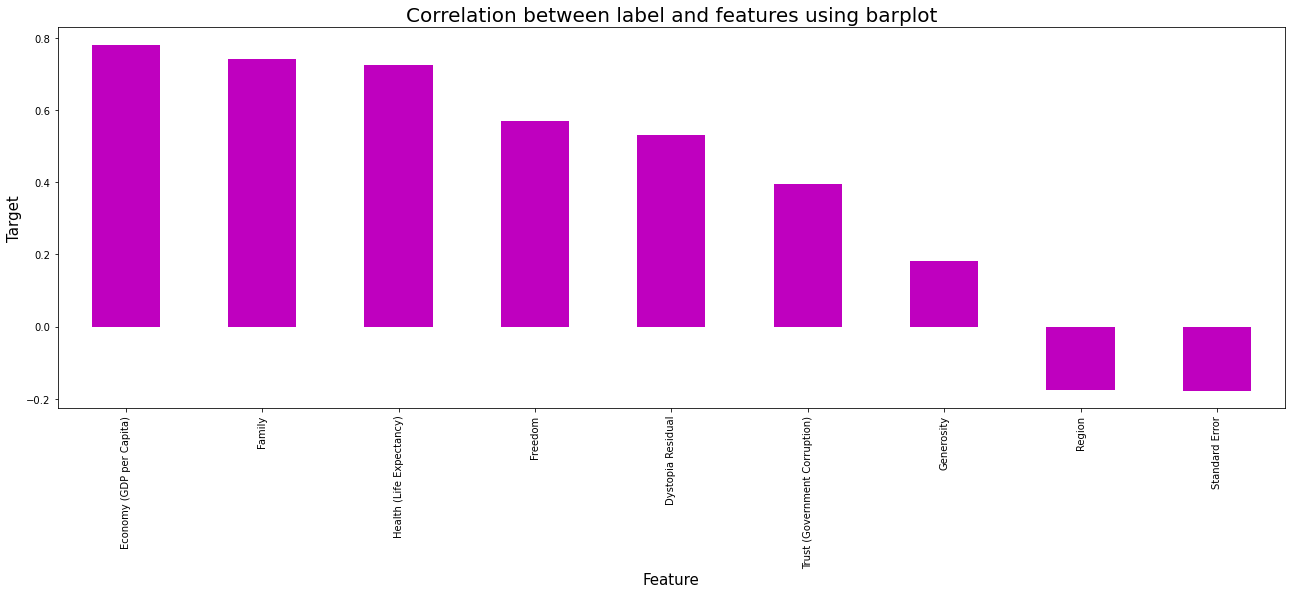

In [87]:
plt.figure(figsize=(22,7))
df3.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

## Splitting the data into target and label

In [88]:
x=df3.drop('Happiness Score',axis=1)
y=df3['Happiness Score']

In [89]:
x.shape

(158, 9)

In [90]:
y.shape

(158,)

### Feature Scaling using Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.300256,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.040302,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,0.965117,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,0.965117,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-0.375441,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,0.965117,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


We scale only feature not the label so both needed to be separated initially and Standard Scalar method to overcome the issue of biasness.

## VIF
We didn't find any multicollinearity Still we are going to cross-check

In [93]:
#  Finding varience inflation factor in each scaled column i.e, x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,1.397291,Region
1,1.157363,Standard Error
2,4.144213,Economy (GDP per Capita)
3,1.951082,Family
4,3.819801,Health (Life Expectancy)
5,1.762236,Freedom
6,1.465160,Trust (Government Corruption)
7,1.384677,Generosity
8,1.056176,Dystopia Residual


VIF is in acceptable range for all the features.

### Modelling

#### Finding the best random state

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.9999999659882639 at random_state 148


#### Creating train test split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_rs)

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [100]:
training_r2_score = []
testing_r2_score = []

In [101]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [102]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 99.9999924840924
R2_Score of LinearRegression() model on Testing Data is: 99.99999659882639

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 0.00021384603477193434
Mean Square Error of LinearRegression() model is: 6.130488571695983e-08
Squarroot Mean Square Error  LinearRegression() model is: 0.00024759823447868085

------------------------------------------------------------------------


In [103]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [104]:
alpha=lasscv.alpha_
alpha

0.0008043373472262253

In [105]:
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=0.0008043373472262253) model on Training Data is: 99.99973809965228
R2_Score of Lasso(alpha=0.0008043373472262253) model on Testing Data is: 99.99967777621782

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.0008043373472262253) model is: 0.0020321474867860956
Mean Square Error of Lasso(alpha=0.0008043373472262253) model is: 5.807963488713207e-06
Squarroot Mean Square Error  Lasso(alpha=0.0008043373472262253) model is: 0.0024099716779898486

------------------------------------------------------------------------


In [106]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [137]:
ridgecv.alpha_

0.001

In [107]:
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.001) model on Training Data is: 99.99999247956772
R2_Score of Ridge(alpha=0.001) model on Testing Data is: 99.99999658617948

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.001) model is: 0.00021257292203502587
Mean Square Error of Ridge(alpha=0.001) model is: 6.153284171669222e-08
Squarroot Mean Square Error  Ridge(alpha=0.001) model is: 0.0002480581418069002

------------------------------------------------------------------------


In [108]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 98.13209125850636
R2_Score of SVR() model on Testing Data is: 89.6680291566108

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 0.27598398330532464
Mean Square Error of SVR() model is: 0.1862299207704654
Squarroot Mean Square Error  SVR() model is: 0.43154364874305057

------------------------------------------------------------------------


In [109]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 98.63499002625116
R2_Score of RandomForestRegressor() model on Testing Data is: 85.41623480465837

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 0.4011550000000006
Mean Square Error of RandomForestRegressor() model is: 0.2628669281041671
Squarroot Mean Square Error  RandomForestRegressor() model is: 0.5127054984142135

------------------------------------------------------------------------


In [110]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 99.94925233373294
R2_Score of GradientBoostingRegressor() model on Testing Data is: 91.37830591362602

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 0.30248885438840994
Mean Square Error of GradientBoostingRegressor() model is: 0.15540282013474238
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 0.3942116438345554

------------------------------------------------------------------------


In [111]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 80.16702487706353

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 0.4567291666666667
Mean Square Error of DecisionTreeRegressor() model is: 0.3574819791666668
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 0.5978979671872675

------------------------------------------------------------------------


In [112]:
model_prediction(KNeighborsRegressor())

R2_Score of KNeighborsRegressor() model on Training Data is: 89.84168618877656
R2_Score of KNeighborsRegressor() model on Testing Data is: 88.91505652168507

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor() model is: 0.36484999999999995
Mean Square Error of KNeighborsRegressor() model is: 0.1998019716666666
Squarroot Mean Square Error  KNeighborsRegressor() model is: 0.4469921382604694

------------------------------------------------------------------------


In [113]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 95.52341571055113
R2_Score of AdaBoostRegressor() model on Testing Data is: 80.95834443855699

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 0.4709636715417758
Mean Square Error of AdaBoostRegressor() model is: 0.34321873922195306
Squarroot Mean Square Error  AdaBoostRegressor() model is: 0.5858487340789882

------------------------------------------------------------------------


In [114]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.99995352844347
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [115]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','AdaBoostRegressor','XGBRegressor']

In [116]:
df4 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df4

,Algorithms,Training R2 Score,Testing R2 Score
0,LinearRegression,99.999992,99.999997
1,Lasso,99.999738,99.999678
2,Ridge,99.999992,99.999997
3,SVR,98.132091,89.668029
4,RandomForestRegressor,98.634990,85.416235
5,GradientBoostingRegressor,99.949252,91.378306
6,DecisionTreeRegressor,100.000000,80.167025
7,KNeighborsRegressor,89.841686,88.915057
8,AdaBoostRegressor,95.523416,80.958344
9,XGBRegressor,99.999954,89.573088


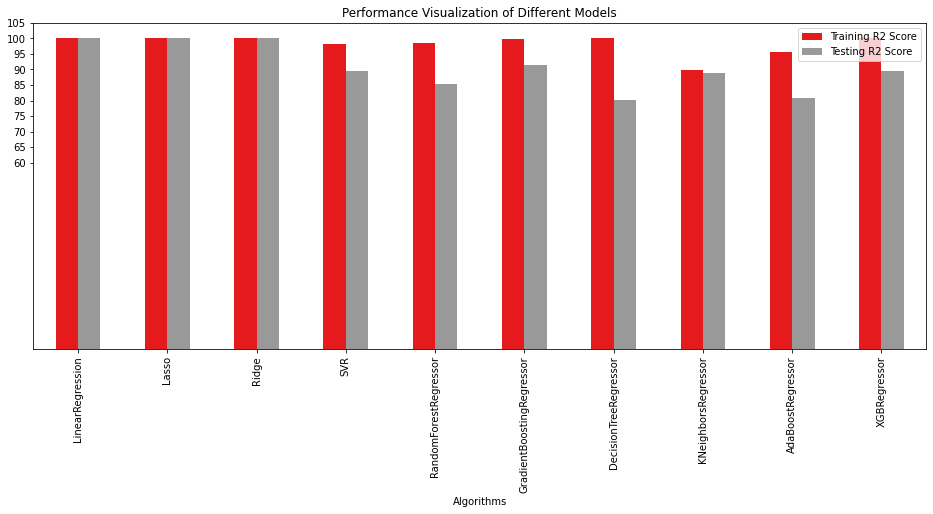

In [118]:
df4.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

### Cross validation score

In [119]:
from sklearn.model_selection import cross_val_score

In [125]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[0]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.99999948 0.99999842 0.99999825 0.99999551 0.99999937]
0.9999982064667714
0.9999999659882639
Differnet between Accuracy score and cross validation score is-  1.759521492505911e-06


In [126]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[1]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
-21.378967758942114
0.9999967777621782
Differnet between Accuracy score and cross validation score is-  22.37896453670429


In [127]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[2]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.99424825 0.9996411  0.99955078 0.99931956 0.99808444]
0.9981688268359038
0.9999999658617947
Differnet between Accuracy score and cross validation score is-  0.0018311390258909377


In [128]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[3]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[-10.58310994   0.14315729   0.83610414  -0.22460464  -5.6289788 ]
-3.091486388307159
0.896680291566108
Differnet between Accuracy score and cross validation score is-  3.988166679873267


In [129]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[4]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[-7.56576266 -1.33714676 -1.1876183  -1.65051563 -5.66313858]
-3.4808363860091847
0.8541623480465838
Differnet between Accuracy score and cross validation score is-  4.334998734055769


In [130]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[5]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[-3.57306002 -0.98249563 -2.37213171 -1.68900981 -3.90118397]
-2.503576228583658
0.9137830591362602
Differnet between Accuracy score and cross validation score is-  3.4173592877199184


In [131]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[6]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[ -5.15274662  -7.37139017  -7.36917682 -12.25993648  -5.72743242]
-7.576136499273818
0.8016702487706353
Differnet between Accuracy score and cross validation score is-  8.377806748044453


In [132]:
# checking cv score for logistic Regression
score = cross_val_score(KNeighborsRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[7]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[-9.19603608 -2.3730639  -3.39345473 -7.40665352 -4.71075043]
-5.415991734128745
0.8891505652168508
Differnet between Accuracy score and cross validation score is-  6.305142299345596


In [133]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[8]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[-9.29712933 -7.04671126 -3.96326514 -5.22451474 -6.36184246]
-6.378692586254132
0.80958344438557
Differnet between Accuracy score and cross validation score is-  7.188276030639702


In [134]:
score = cross_val_score(XGBRegressor(),x,y)
print(score)
print(score.mean())
print(testing_r2_score[9]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[9]/100)- score.mean())

[-4.85985906 -0.72744778 -1.64280369 -4.43414226 -3.34940681]
-3.002731919332517
0.8957308834689393
Differnet between Accuracy score and cross validation score is-  3.8984628028014563


Ridge is the best model with least accuracy difference

### Hpyerparameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
model=Ridge()

In [142]:
param_grid={'alpha':[0.001,0.003,0.005],
           'fit_intercept':[True,False],
           'max_iter':[10,20,50,100,300],
           'random_state':[144,150,100,125]}

In [143]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.003, 0.005],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 20, 50, 100, 300],
                         'random_state': [144, 150, 100, 125]})

In [144]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 10, 'random_state': 144}

In [145]:
model_prediction(Ridge(alpha= 0.001, fit_intercept= True, max_iter= 10, random_state= 144))

R2_Score of Ridge(alpha=0.001, max_iter=10, random_state=144) model on Training Data is: 99.99999247956772
R2_Score of Ridge(alpha=0.001, max_iter=10, random_state=144) model on Testing Data is: 99.99999658617948

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.001, max_iter=10, random_state=144) model is: 0.00021257292203502587
Mean Square Error of Ridge(alpha=0.001, max_iter=10, random_state=144) model is: 6.153284171669222e-08
Squarroot Mean Square Error  Ridge(alpha=0.001, max_iter=10, random_state=144) model is: 0.0002480581418069002

------------------------------------------------------------------------


In [146]:
model=Ridge(alpha= 0.001, fit_intercept= True, max_iter= 10, random_state= 144)

In [148]:
model.fit(x_train,y_train)

Ridge(alpha=0.001, max_iter=10, random_state=144)

### Saving the model

In [150]:
import pickle
filename='Happiness.pkl'
pickle.dump(model,open(filename,'wb'))#saved model

### Loading the model

In [151]:
loaded_model=pickle.load(open('Happiness.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.99999658617948


In [152]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,4.194343,4.51788,6.810211,5.013089,4.507199,4.270667,7.526979,6.786207,6.797757,4.897546,...,7.27767,4.875973,6.269215,5.47696,4.971105,7.522111,3.844978,6.411216,6.12275,4.332141
Original,4.194000,4.51800,6.810000,5.013000,4.507000,4.271000,7.527000,6.786000,6.798000,4.898000,...,7.27800,4.876000,6.269000,5.47700,4.971000,7.522000,3.845000,6.411000,6.12300,4.332000
